<h1>INFOSYS SPRINGBOARD</h1>

<div style="border-radius:10px; padding: 15px; background-color: #C1FDBC; font-size:130%; text-align:left">

<h2 align="left"><font color=black> Building Anomaly Detection System using Python </font></h2>
<h4>(unsupervised approach)</h4>

<div style="border-radius:10px; padding: 15px; background-color: #87CEEB; font-size:130%; text-align:left">

<h2 align="left"><font color=black>Problem Statement:</font></h2>


In this project, we delve deep into the thriving sector of __Security__ by analyzing a __Anomaly detection on Healthcare Dataset__ from a USA-based Health Service Providers, available at the kaggle. This dataset documents all transactions between patients and service providers. Our primary objective is to amplify the efficiency of Healthcare System and avoid fraudulent transactions in __Healthcare system__. We aim to transform the data into a -centric dataset  that will facilitate the Base for Anomaly Detection system of patient providing better service , ultimately enhancing security ,efficiency and patient service.

In [1]:
#importing necessary libraries
#loading dataset

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import statistics
from matplotlib.colors import LinearSegmentedColormap
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import shap

df = pd.read_csv(r'C:\Users\tmbha\Downloads\ifosys_springboard\df_processed.csv')  #orignal Dataframe after EDA
hdata_scaled = pd.read_csv(r'C:\Users\tmbha\Downloads\ifosys_springboard\test.csv') #scaled Dataframe after scaling milestone 2

C:\Users\tmbha\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#overview of orignal dataframe after EDA
df_i = df #making copy of dataset for further use in isolation approach
df_s = df #making copy of dataset for further use in one SVM approach


In [3]:
#overview of scaled dataframe
hdata_scaled.sample(5) 

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Diff_submitted_allowed,Is_US,Gender,Entity,Medicare_Participation_Indicator,Place_of_Service,HCPCS_Drug_Indicator,Credentials of the Provider_FrequencyEncoded,City of the Provider_FrequencyEncoded,State Code of the Provider_FrequencyEncoded,ProviderType_FrequencyEncoded,HCPCS Description_FrequencyEncoded
90326,-0.070862,-0.053000,-0.048235,-0.234970,-0.104037,-0.237869,-0.235825,-0.056343,1,1,1,1,1,1,-1.684316,-0.680231,0.142517,-0.720441,-0.635101
12579,-0.065648,-0.016050,-0.040309,-0.267469,-0.277197,-0.280491,-0.267132,-0.253844,1,1,1,1,1,1,0.594983,-0.741992,-0.811935,1.336743,-0.537125
86786,-0.065648,-0.030470,-0.040309,-0.125773,-0.205625,-0.129553,-0.102566,-0.209312,1,0,1,1,1,1,0.594983,0.179678,-0.093553,-0.771766,3.002764
36405,0.161372,0.220069,0.304767,-0.102488,-0.192060,-0.128449,-0.123258,-0.199839,1,1,1,1,1,1,0.594983,-0.713487,1.494517,-0.979709,3.002764
38833,-0.074873,-0.048494,-0.054332,0.001655,-0.014634,0.003752,0.021090,-0.017965,1,0,1,1,0,1,0.594983,-0.703985,-0.803882,-0.153223,0.336696



# <p style="background-color: #2AE05D; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 10 | Model Building</p>

<div style="border-radius:10px; padding: 15px; background-color: #C5A3D4; font-size:130%; text-align:left">

<h2 align="left"><font color=black> Using Isolation Forest algorithm </font></h2>

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

    
- Given the multi-dimensional nature of the data, it would be prudent to use algorithms that can detect anomalies in multi-dimensional spaces. I am going to use the __Isolation Forest__ algorithm for this task. This algorithm works well for multi-dimensional data and is computationally efficient. It isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature  

In [4]:
# Initializing the IsolationForest model with a contamination parameter of auto
#max_feature parameter 1 to 9
#using Default parameters as it's unsupervised approach considering we don't know the depth of data
model = IsolationForest(n_estimators=100, contamination=0.025, random_state=42, max_samples='auto')

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning) on orignal dataframe
df_i['Anomaly_Scores'] = model.fit_predict(hdata_scaled.iloc[:, 1:].to_numpy())

# Creating a new column to identify anomalies (1 for inliers and -1 for outliers) on orignal dataframe
df_i['Is_Anomaly'] = [1 if x == -1 else 0 for x in df_i['Anomaly_Scores']]

# Display the first few rows of the orignal dataframe
df_i.sample(5).T

,49894,71692,61404,57229,96476
Credentials of the Provider,DO,MD,DO,NP,MD
Gender of the Provider,F,F,F,F,M
Entity Type of the Provider,I,I,I,I,I
City of the Provider,BURLINGTON,MYRTLE BEACH,DALLAS,MCMINNVILLE,VENTURA
State Code of the Provider,VT,SC,TX,TN,CA
Country Code of the Provider,US,US,US,US,US
ProviderType,Surgical Oncology,Internal Medicine,Internal Medicine,Nurse Practitioner,Diagnostic Radiology
Medicare Participation Indicator,Y,Y,Y,Y,Y
Place of Service,F,O,F,O,F
HCPCS Description,Ultrasound of one breast,"Electrocardiogram, routine ecg with 12 leads; ...","Subsequent hospital inpatient care, typically ...","Injection, triamcinolone acetonide, not otherw...",CT scan of lower spine


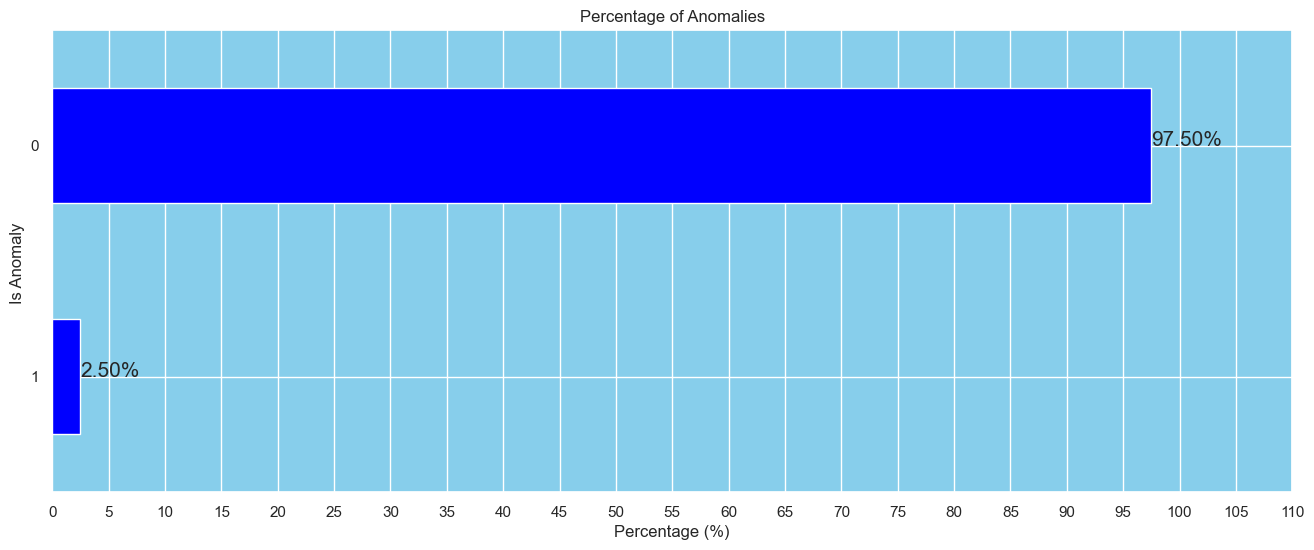

In [5]:
# Set seaborn plot style
sns.set(rc={'axes.facecolor': 'skyblue'}, style='darkgrid')

# Calculate the percentage of anomalies
anomalies_percentage = df_i['Is_Anomaly'].value_counts(normalize=True) * 100

# Plotting the percentage of anomalies
plt.figure(figsize=(16,6))
anomalies_percentage.plot(kind='barh', color='Blue')

# Adding the percentage labels on the bars
for index, value in enumerate(anomalies_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Anomalies')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Anomaly ')
plt.gca().invert_yaxis()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: pink; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inferences from the Graph :</font></h3>
    
- There are total __2.50%__ anomalies are detected by our model i.e.around 2500 entries in entire dataset    .


PermutationExplainer explainer: 20001it [07:42, 41.75it/s]                                                             


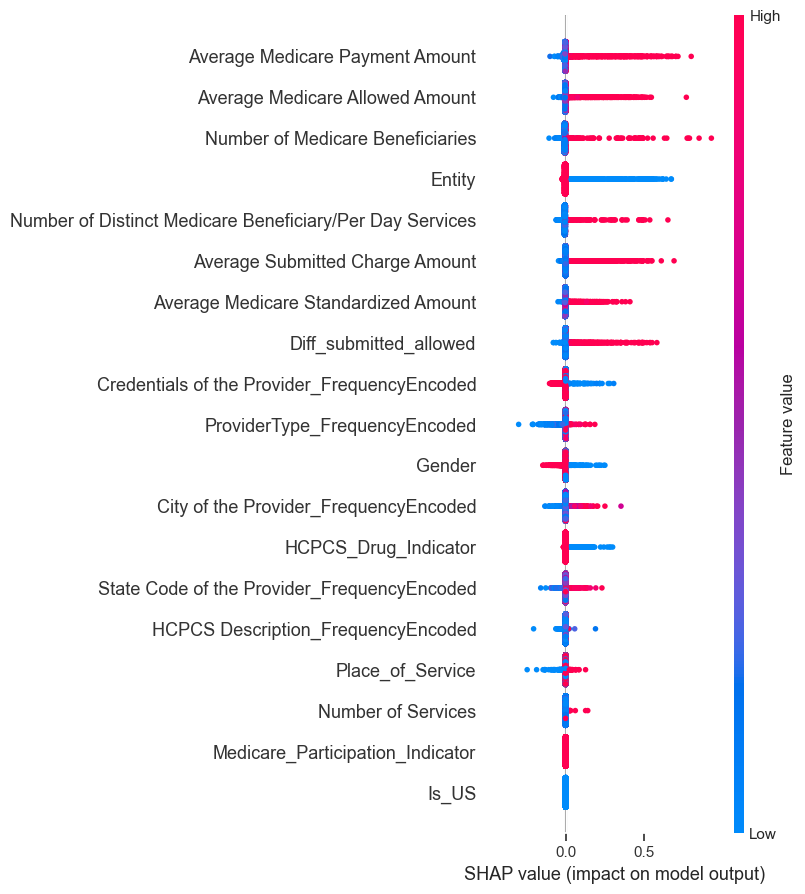

In [15]:
sns.set(rc={'axes.facecolor': 'white'}, style='darkgrid')

#creating new dataframe with scaled data and anomaly column as target variable for shap analysis
iso = hdata_scaled.join(df_i['Is_Anomaly'], how='inner')

#creating sample size due to system constraints
#iso_sample = iso.sample(n=10000)

#splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iso.drop('Is_Anomaly',axis=1),iso['Is_Anomaly'],test_size=0.2, random_state=42)

#Reseting Index of X_test
X_test.reset_index(drop=True,inplace=True)

#training logistic regression model on data
model = LogisticRegression()
model.fit(X_train, y_train)

#creating a SHAP explainer object
explainer = shap.Explainer(model.predict,X_train,algorithm='permutation')

#computing shap values for the testing data
shap_values = explainer.shap_values(X_test)

#Plotting the SHAP values using a summary plot
shap.summary_plot(shap_values, X_test, show=False)



plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #40E380; font-size:120%; text-align:left">
<h3 align="left"><font color=black>Inferences from the Summary Plot of Isolation Forest :</font></h3>
    
- There is major __positive__ infulence of columns on model such columns are __Average Medicare Payment Amount__,__Average Medicare Allowed Amount__ overall all numerical columns are has impact on model either positive or negative some categorical columns such as __city__ and __State__ of the provider also has some contributions to model     .


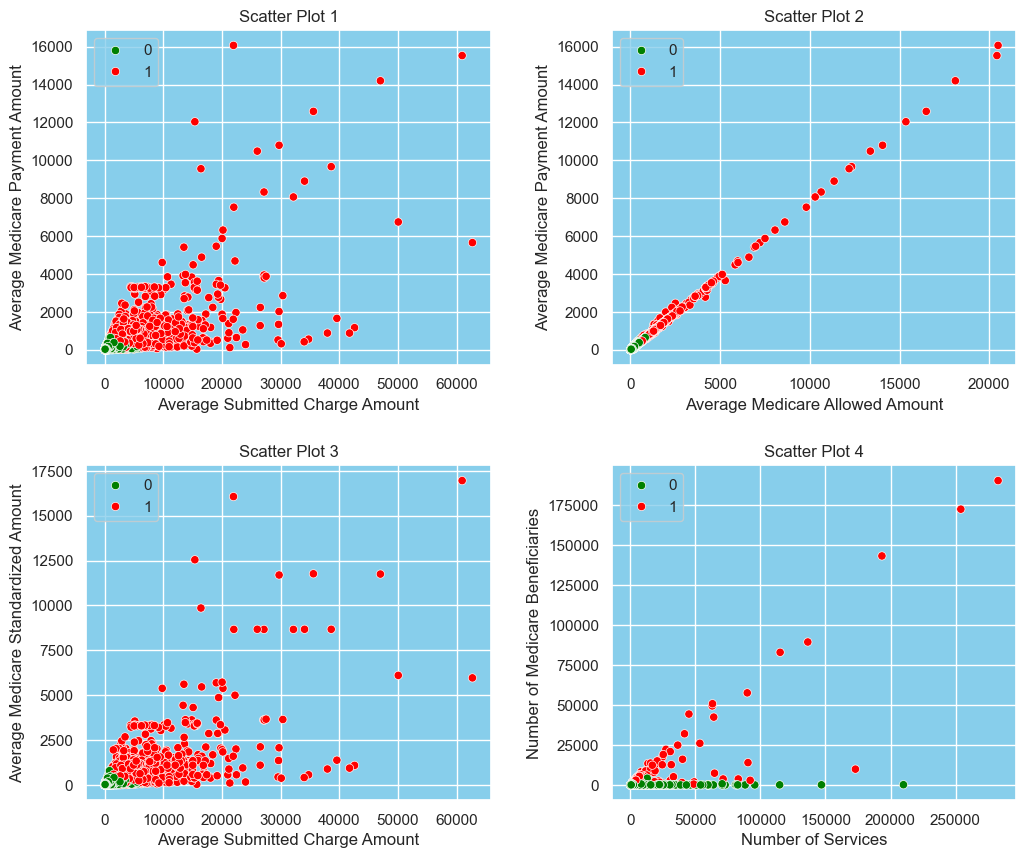

In [26]:
sns.set(rc={'axes.facecolor': 'skyblue'}, style='darkgrid')
fig, axs = plt.subplots(2,2, figsize=(12,10))

#Scatter plot 1
sns.scatterplot(x='Average Submitted Charge Amount', y='Average Medicare Payment Amount',data=df_i, hue='Is_Anomaly',ax=axs[0,0],
               palette=['green','red'])
axs[0,0].set_title('Scatter Plot 1')
axs[0,0].set_xlabel('Average Submitted Charge Amount')
axs[0,0].set_ylabel('Average Medicare Payment Amount')
axs[0,0].legend()

#Scatter plot 2
sns.scatterplot(x='Average Medicare Allowed Amount', y='Average Medicare Payment Amount',data=df_i, hue='Is_Anomaly',ax=axs[0,1],
               palette=['green','red'])
axs[0,1].set_title('Scatter Plot 2')
axs[0,1].set_xlabel('Average Medicare Allowed Amount')
axs[0,1].set_ylabel('Average Medicare Payment Amount')
axs[0,1].legend()

#Scatter plot 3
sns.scatterplot(x='Average Submitted Charge Amount', y='Average Medicare Standardized Amount',data=df_i, hue='Is_Anomaly',ax=axs[1,0],
               palette=['green','red'])
axs[1,0].set_title('Scatter Plot 3')
axs[1,0].set_xlabel('Average Submitted Charge Amount')
axs[1,0].set_ylabel('Average Medicare Standardized Amount')
axs[1,0].legend()

#Scatter plot 4
sns.scatterplot(x='Number of Services', y='Number of Medicare Beneficiaries',data=df_i, hue='Is_Anomaly',ax=axs[1,1],
               palette=['green','red'])
axs[1,1].set_title('Scatter Plot 4')
axs[1,1].set_xlabel('Number of Services')
axs[1,1].set_ylabel('Number of Medicare Beneficiaries')
axs[1,1].legend()

plt.subplots_adjust(wspace=0.3,hspace=0.3)

plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #8DFC65; font-size:120%; text-align:left">
<h3 align="left"><font color=Black>Inferences from the Scatter-Plots :</font></h3>
    
- By Visualizing the __Scatter Plots__ we can see that our __Isolation Forest__ algorithm works well, and our model is able to distinguish between Normal points and Anomalies.
- There is __clear separation__ can be seen between the normal and anomalous point
- __Green__ dots indicates the __Normal__ points while __red__ dots indicates __Anomaly__.

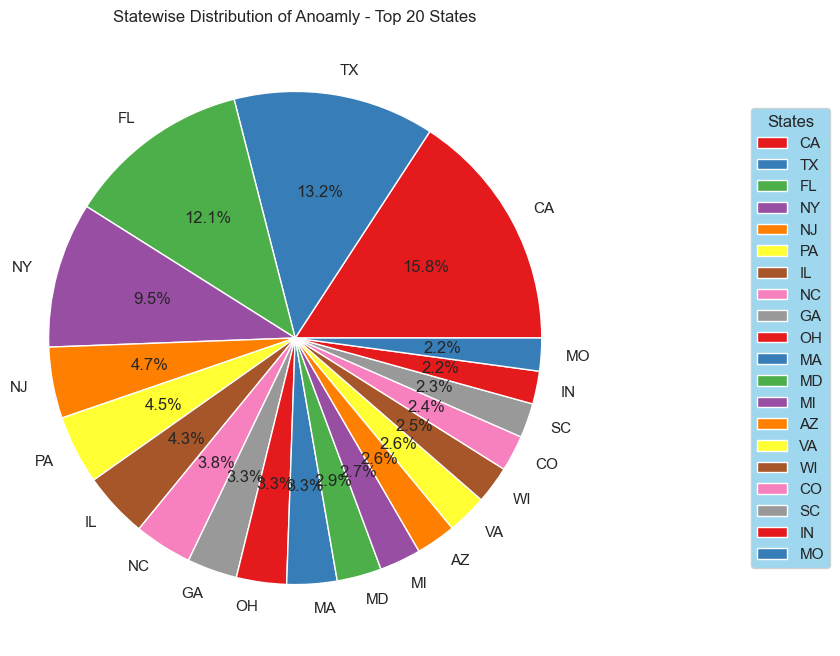

In [27]:
#filtering States with rows which has anomaly 
States_with_anomalies = df_i[df_i['Is_Anomaly']==1]['State Code of the Provider']

# counting the States with occurence
State_counts = States_with_anomalies.value_counts(normalize=True).head(20)

#creating pie chart
plt.figure(figsize=(7,8))
plt.pie(State_counts,labels=State_counts.index, autopct='%1.1f%%',colors=sns.color_palette('Set1'))
plt.axis('equal')
plt.title('Statewise Distribution of Anoamly - Top 20 States')
plt.legend(title='States' ,loc='center right',bbox_to_anchor=(1,0,0.5,1))
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #73FBFD; font-size:120%; text-align:left">
<h3 align="left"><font color=Black>Inferences from the Pie-Chart :</font></h3>
    
- The pie chart shows __Top 20 state__ with anomaly percentage where __California__ has highest no of anomalies __15.8%__ followed by __Texas__ __13.2%__, __Florida__ __12.2%__ .


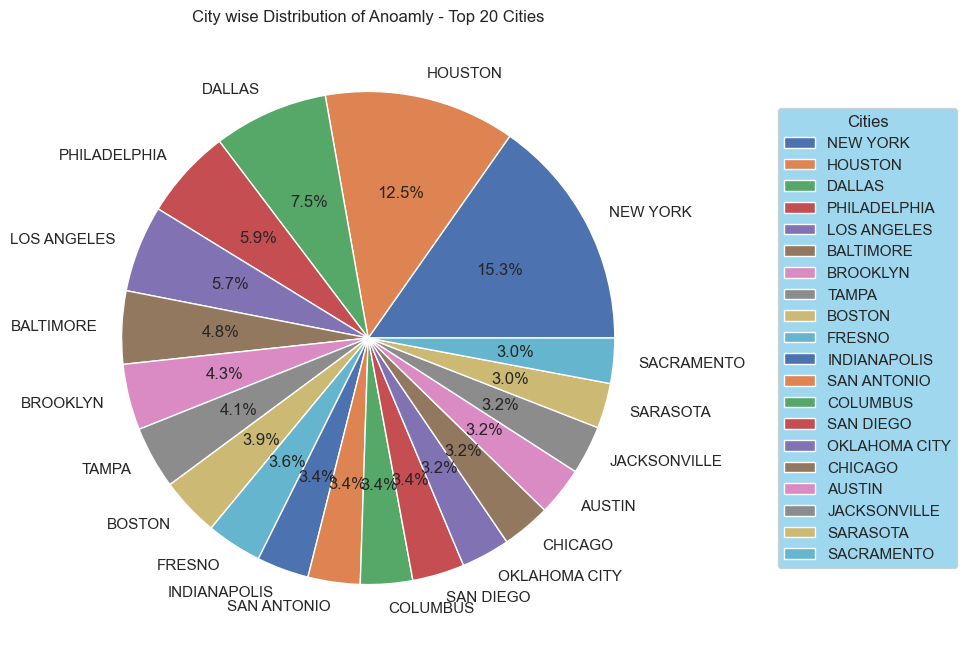

In [28]:
#filtering cities with rows which has anomaly 
cities_with_anomalies = df_i[df_i['Is_Anomaly']==1]['City of the Provider']

# counting the cities with occurence
city_counts = cities_with_anomalies.value_counts(normalize=True).head(20)

#creating pie chart
plt.figure(figsize=(7,8))
plt.pie(city_counts,labels=city_counts.index, autopct='%1.1f%%')
plt.title('City wise Distribution of Anoamly - Top 20 Cities')
plt.axis('equal')
plt.legend(title='Cities' ,loc='center right',bbox_to_anchor=(1,0,0.6,1))
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #73FBFD; font-size:120%; text-align:left">
<h3 align="left"><font color=Black>Inferences from the Pie-Chart :</font></h3>
    
- The pie chart shows __Top 20 Cities__ with anomaly percentage where __NEWYORK__ has highest no of anomalies __15.3%__ followed by __Houston__ __12.5%__ and __Dallas__ __7.5%__ .


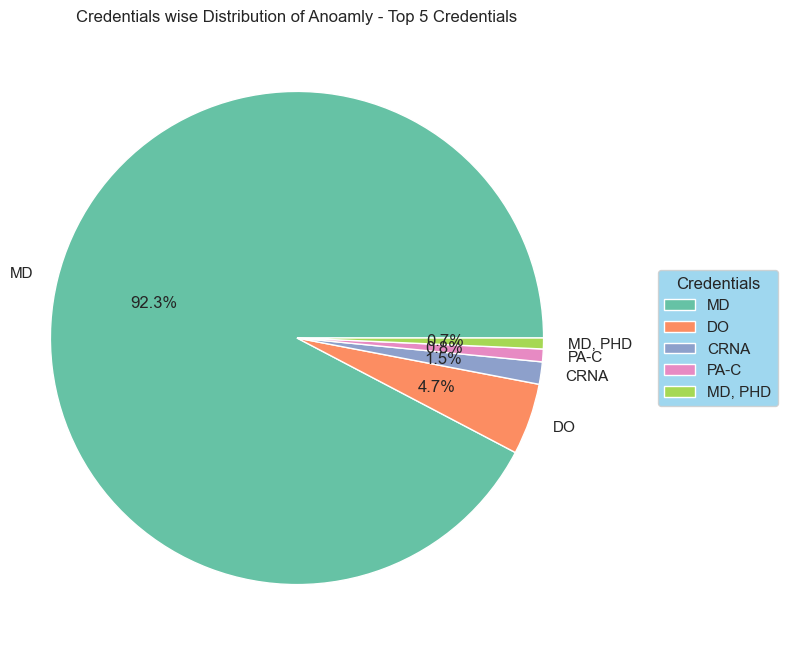

In [29]:
#filtering Credentials of the Provider with rows which has anomaly 
Credentials_with_anomalies = df_i[df_i['Is_Anomaly']==1]['Credentials of the Provider']

# counting the Credentials with occurence
Credential_counts = Credentials_with_anomalies.value_counts(normalize=True).head(5)

#creating pie chart
plt.figure(figsize=(7,8))
plt.pie(Credential_counts,labels=Credential_counts.index, autopct='%1.1f%%',colors=sns.color_palette('Set2'))
plt.title('Credentials wise Distribution of Anoamly - Top 5 Credentials')
plt.axis('equal')
plt.legend(title='Credentials' ,loc='center right',bbox_to_anchor=(1,0,0.4,1))
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #73FBFD; font-size:120%; text-align:left">
<h3 align="left"><font color=Black>Inferences from the Pie-Chart :</font></h3>
    
- The pie chart shows __Top 5 Credentials__ with anomaly percentage where __MD__ has highest no of anomalies __92.3%__ followed by __DO__ __4.7%__,  __CRNA__ __1.5%__ .


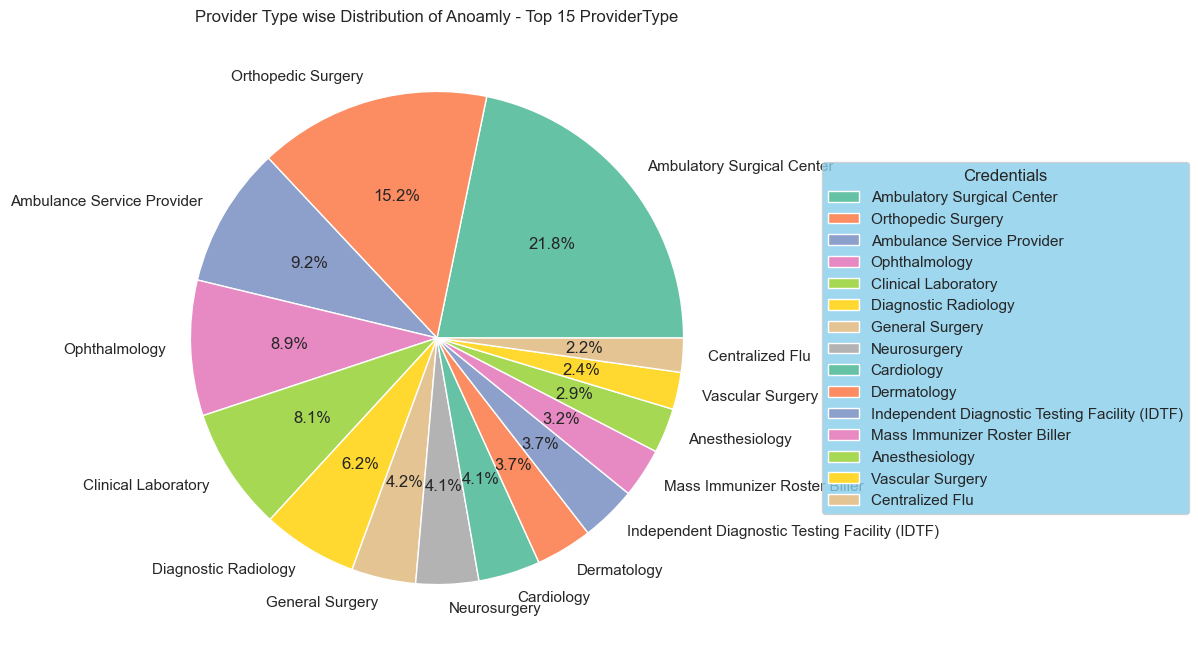

In [30]:
#filtering ProviderType with rows which has anomaly 
ProviderType_with_anomalies = df_i[df_i['Is_Anomaly']==1]['ProviderType']

# counting the ProviderType with occurence
ProviderType_counts = ProviderType_with_anomalies.value_counts(normalize=True).head(15)

#creating pie chart
plt.figure(figsize=(7,8))
plt.pie(ProviderType_counts,labels=ProviderType_counts.index, autopct='%1.1f%%',colors=sns.color_palette('Set2'))
plt.title('Provider Type wise Distribution of Anoamly - Top 15 ProviderType')
plt.axis('equal')
plt.legend(title='Credentials' ,loc='center right',bbox_to_anchor=(1,0,0.9,1))
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #73FBFD; font-size:120%; text-align:left">
<h3 align="left"><font color=Black>Inferences from the Pie-Chart :</font></h3>
    
- The pie chart shows __Top 15 ProviderType__ with anomaly percentage where __Ambulatory Surgical Center__ has highest no of anomalies __21.8%__ followed by __Ortopedic Surgery__ __15.2%__,  __Ambulance Service Provider__ __9.2%__ .


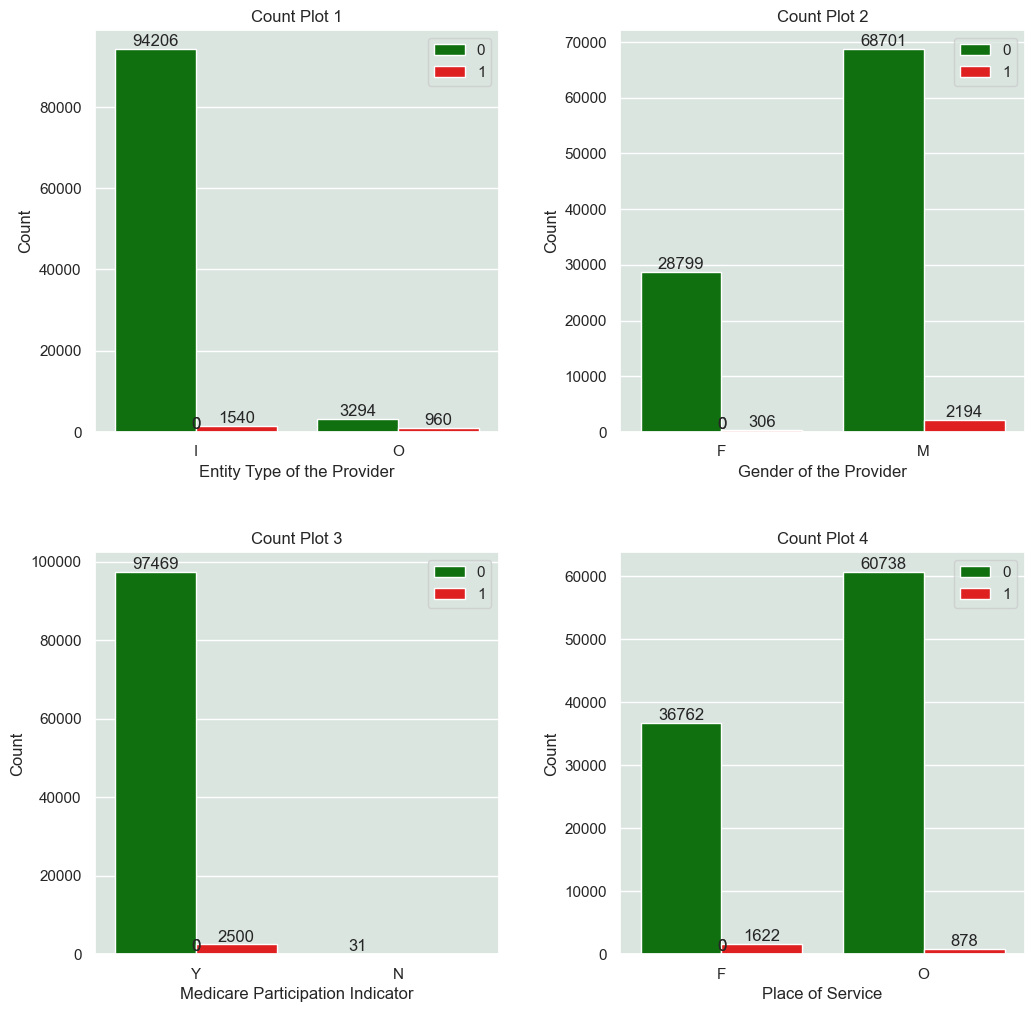

In [11]:
sns.set(rc={'axes.facecolor': '#DAE5E0'}, style='darkgrid')
fig, axs = plt.subplots(2,2, figsize=(12,12))

#Count plot 1
sns.countplot(x='Entity Type of the Provider',data=df_i, hue='Is_Anomaly',ax=axs[0,0],palette=['green','red'])
axs[0,0].set_title('Count Plot 1')
axs[0,0].set_xlabel('Entity Type of the Provider')
axs[0,0].set_ylabel('Count')
axs[0,0].legend()

#Count plot 2
sns.countplot(x='Gender of the Provider',data=df_i, hue='Is_Anomaly',ax=axs[0,1],palette=['green','red'])
axs[0,1].set_title('Count Plot 2')
axs[0,1].set_xlabel('Gender of the Provider')
axs[0,1].set_ylabel('Count')
axs[0,1].legend()

#Count plot 3
sns.countplot(x='Medicare Participation Indicator',data=df_i, hue='Is_Anomaly',ax=axs[1,0],palette=['green','red'])
axs[1,0].set_title('Count Plot 3')
axs[1,0].set_xlabel('Medicare Participation Indicator')
axs[1,0].set_ylabel('Count')
axs[1,0].legend()

#Count plot 1
sns.countplot(x='Place of Service',data=df_i, hue='Is_Anomaly',ax=axs[1,1],palette=['green','red'])
axs[1,1].set_title('Count Plot 4')
axs[1,1].set_xlabel('Place of Service')
axs[1,1].set_ylabel('Count')
axs[1,1].legend()

for ax in axs.flat:
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), ha='center', va='bottom')

plt.subplots_adjust(wspace=0.3,hspace=0.3)

plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #FCEF61; font-size:120%; text-align:left">
<h3 align="left"><font color=Black>Inferences from the Count Plots :</font></h3>
    
- The Countplots shows the anomaly in the __categorical columns__ <font color=red> __red__ </font> bars shows __anomaly__ and the <font color=green> __green__ </font>bars represent the __normal__ point.
- __Count Plot 1__ shows anomaly in the __Entity__ where __I-individual__ has <font color=red> __1540__ </font> __anomalies__ where __O-organization__ has<font color=red> __960__ </font> __anomalies__ only which indicates that individual entity has more fraudulent transactions.
- __Count Plot 2__ shows anomaly in the __Gender__ where __F-Female__ has <font color=red> __306__ </font> __anomalies__ where __M-Male__ has<font color=red> __2194__ </font> __anomalies__  which indicates that  in Male has more fraudulent transactions.
- __Count Plot 3__ shows anomaly in the __Medicare Participation Indicator__ where __Y-Yes__ has <font color=red> __2500__ </font> __anomalies__ where __N-No__ has<font color=red> __0__ </font> __anomalies__ only which indicates that __Yes has all__ fraudulent transactions.
- __Count Plot 4__ shows anomaly in the __Place of Service__ where __F-Facility__ has <font color=red> __1622__ </font> __anomalies__ where __O-Non-Facility__ has<font color=red> __878__ </font> __anomalies__  which indicates that facility has more no of fraudulent transactions.


<div style="border-radius:10px; padding: 15px; background-color: #C5A3D4; font-size:130%; text-align:left">

<h2 align="left"><font color=black> Using Elliptic Envelope algorithm </font></h2>

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

    
- Given the multi-dimensional nature of the data, it would be prudent to use algorithms that can detect anomalies in multi-dimensional spaces. I am going to use the __Elliptic Envelope__ algorithm for this task. Elliptic Envelope is an unsupervised machine learning algorithm used for anomaly detection. It creates an imaginary area around the given dataset ,with values inside envelope considered as normal and anything outside labeled as outliers. 

In [12]:
anomaly_detector = EllipticEnvelope(contamination=0.02)
anomaly_detector.fit(hdata_scaled)
df['Anomaly_Scores'] = anomaly_detector.predict(hdata_scaled)
df['Is_Anomaly'] = [1 if x == -1 else 0 for x in df['Anomaly_Scores']]

C:\Users\tmbha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\covariance\_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


In [40]:
df.sample(5).T

,73252,12791,87501,71463,96261
Credentials of the Provider,"MD, MBA",MD,MD,MD,MD
Gender of the Provider,M,M,M,F,M
Entity Type of the Provider,I,I,I,I,I
City of the Provider,LUBBOCK,ROCKLEDGE,WICHITA,NEWARK,DEDHAM
State Code of the Provider,TX,FL,KS,NJ,MA
Country Code of the Provider,US,US,US,US,US
ProviderType,Rheumatology,Family Practice,Cardiology,Psychiatry,Internal Medicine
Medicare Participation Indicator,Y,Y,Y,Y,Y
Place of Service,O,O,F,F,O
HCPCS Description,Injection beneath the skin or into muscle for ...,"New patient office or other outpatient visit, ...","Hospital discharge day management, 30 minutes ...","Hospital discharge day management, 30 minutes ...",Phosphate level


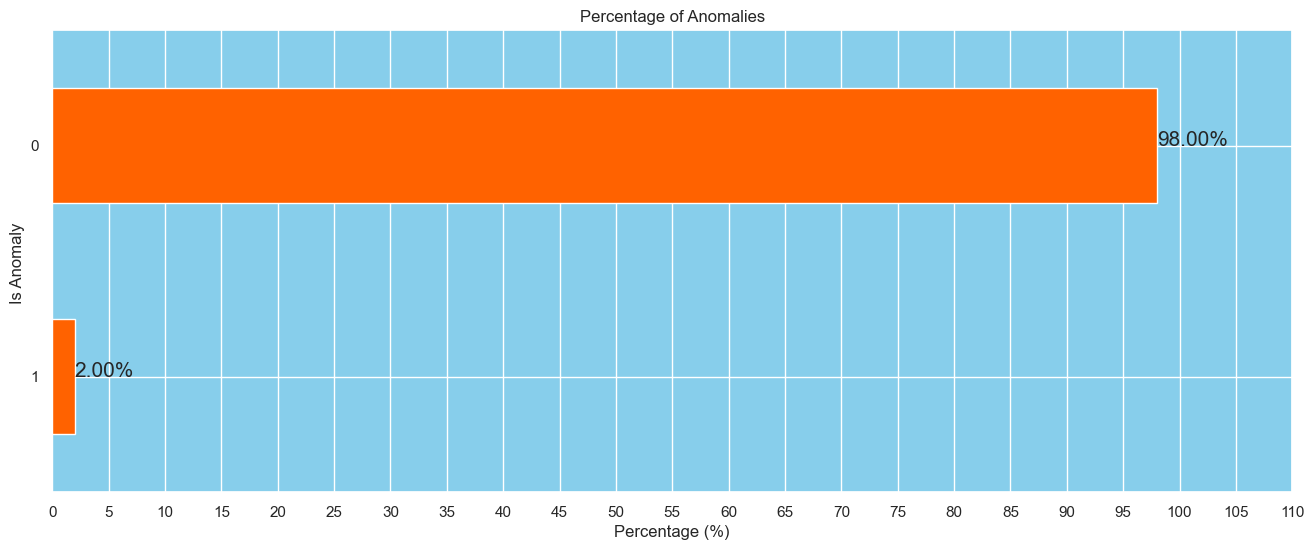

In [42]:
# Set seaborn plot style
sns.set(rc={'axes.facecolor': 'skyblue'}, style='darkgrid')

# Calculate the percentage of anomalies
anomalies_percentage = df['Is_Anomaly'].value_counts(normalize=True) * 100

# Plotting the percentage of anomalies
plt.figure(figsize=(16,6))
anomalies_percentage.plot(kind='barh', color='#ff6200')

# Adding the percentage labels on the bars
for index, value in enumerate(anomalies_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Anomalies')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Anomaly ')
plt.gca().invert_yaxis()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: pink; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inferences from the Graph :</font></h3>
    
- There are total __2.00%__ anomalies are detected by our model i.e.around 2000 entries in entire dataset    .


PermutationExplainer explainer: 20001it [04:26, 72.73it/s]                                                             


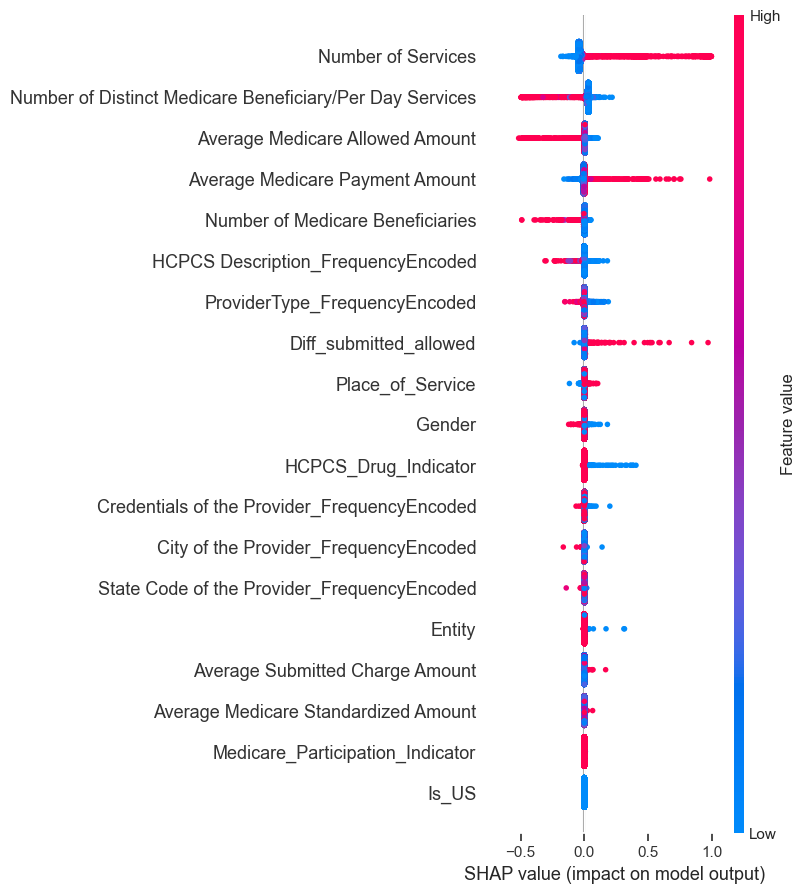

In [43]:
sns.set(rc={'axes.facecolor': 'white'}, style='darkgrid')

#creating new dataframe with scaled data and anomaly column as target variable for shap analysis
EE = hdata_scaled.join(df['Is_Anomaly'], how='inner')

#creating sample size due to system constraints
#EE_sample = EE.sample(n=10000)

#splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(EE.drop('Is_Anomaly',axis=1),EE['Is_Anomaly'],test_size=0.2, random_state=42)

#training logistic regression model on data
model = LogisticRegression()
model.fit(X_train, y_train)

#creating a SHAP explainer object
explainer = shap.Explainer(model.predict,X_train)

#computing shap values for the testing data
shap_values = explainer.shap_values(X_test)

#Plotting the SHAP values using a summary plot
shap.summary_plot(shap_values, X_test, show=False)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #40E380; font-size:120%; text-align:left">
<h3 align="left"><font color=black>Inferences from the Summary Plot of Elliptic Envelope :</font></h3>
    
- There is major __positive__ infulence of columns on model such columns are __Number of services__,   __Average Medicare Payment Amount__ some numerical columns are impacting model __negatively__ like __number of distinct beneficiary__ and __Average Medicare Allowed Amount__ none of categorical columns are adding impact on model not positive or negative (neutral) or no effect .


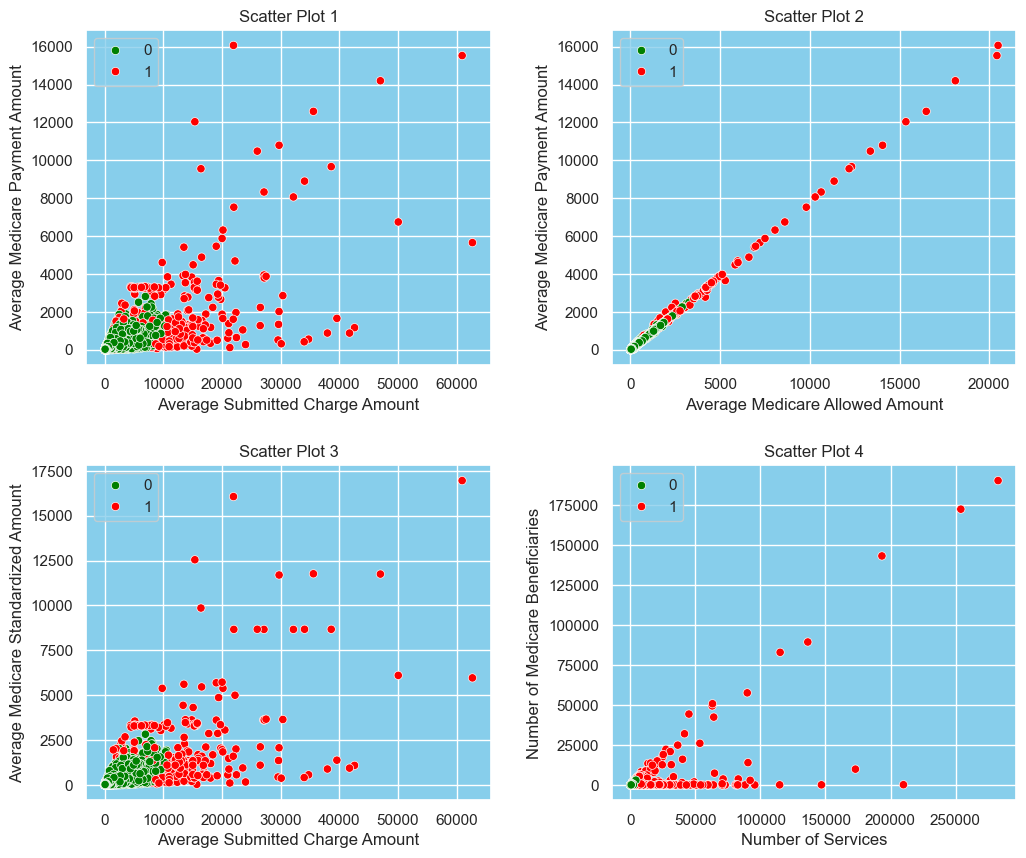

In [36]:
sns.set(rc={'axes.facecolor': 'skyblue'}, style='darkgrid')
fig, axs = plt.subplots(2,2, figsize=(12,10))

#Scatter plot 1
sns.scatterplot(x='Average Submitted Charge Amount', y='Average Medicare Payment Amount',data=df, hue='Is_Anomaly',ax=axs[0,0],
               palette=['green','red'])
axs[0,0].set_title('Scatter Plot 1')
axs[0,0].set_xlabel('Average Submitted Charge Amount')
axs[0,0].set_ylabel('Average Medicare Payment Amount')
axs[0,0].legend()

#Scatter plot 2
sns.scatterplot(x='Average Medicare Allowed Amount', y='Average Medicare Payment Amount',data=df, hue='Is_Anomaly',ax=axs[0,1],
               palette=['green','red'])
axs[0,1].set_title('Scatter Plot 2')
axs[0,1].set_xlabel('Average Medicare Allowed Amount')
axs[0,1].set_ylabel('Average Medicare Payment Amount')
axs[0,1].legend()

#Scatter plot 3
sns.scatterplot(x='Average Submitted Charge Amount', y='Average Medicare Standardized Amount',data=df, hue='Is_Anomaly',ax=axs[1,0],
               palette=['green','red'])
axs[1,0].set_title('Scatter Plot 3')
axs[1,0].set_xlabel('Average Submitted Charge Amount')
axs[1,0].set_ylabel('Average Medicare Standardized Amount')
axs[1,0].legend()

#Scatter plot 4
sns.scatterplot(x='Number of Services', y='Number of Medicare Beneficiaries',data=df, hue='Is_Anomaly',ax=axs[1,1],
               palette=['green','red'])
axs[1,1].set_title('Scatter Plot 4')
axs[1,1].set_xlabel('Number of Services')
axs[1,1].set_ylabel('Number of Medicare Beneficiaries')
axs[1,1].legend()

plt.subplots_adjust(wspace=0.3,hspace=0.3)

plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #8DFC65; font-size:120%; text-align:left">
<h3 align="left"><font color=Black>Inferences from the Scatter-Plots :</font></h3>
    
- By Visualizing the __Scatter Plots__ we can see that our __Elliptic Envelope__ algorithm works well, and our model is able to distinguish between Normal points and Anomalies.
- There is __clear separation__ can be seen between the normal and anomalous point
- __Green__ dots indicates the __Normal__ points while __red__ dots indicates __Anomaly__.

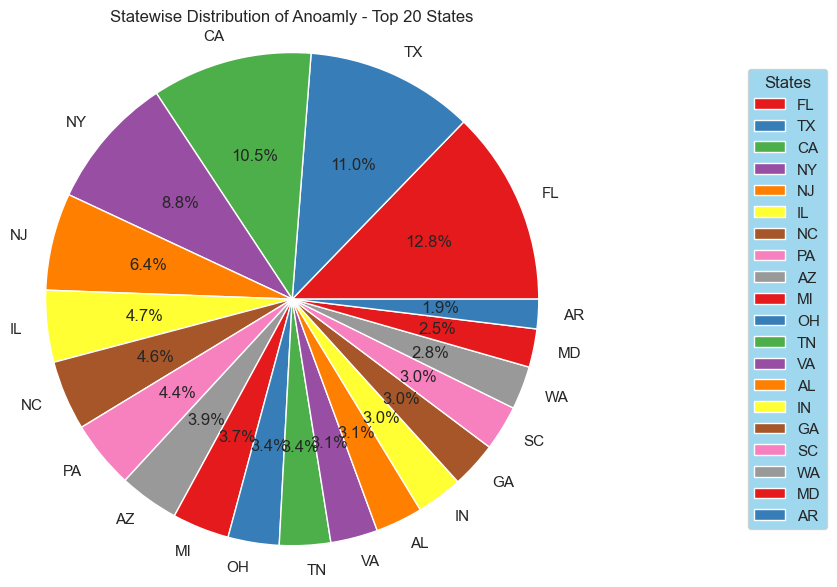

In [37]:
#filtering States with rows which has anomaly 
States_with_anomalies = df[df['Is_Anomaly']==1]['State Code of the Provider']

# counting the States with occurence
State_counts = States_with_anomalies.value_counts(normalize=True).head(20)

#creating pie chart
plt.figure(figsize=(7,7))
plt.pie(State_counts,labels=State_counts.index, autopct='%1.1f%%',colors=sns.color_palette('Set1'))
plt.axis('equal')
plt.title('Statewise Distribution of Anoamly - Top 20 States')
plt.legend(title='States' ,loc='center right',bbox_to_anchor=(1,0,0.5,1))
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #73FBFD; font-size:120%; text-align:left">
<h3 align="left"><font color=Black>Inferences from the Pie-Chart :</font></h3>
    
- The pie chart shows __Top 20 state__ with anomaly percentage where __Florida__ has highest no of anomalies __12.8%__ followed by __Texas__ __11.0%__, __California__ __10.5%__  .


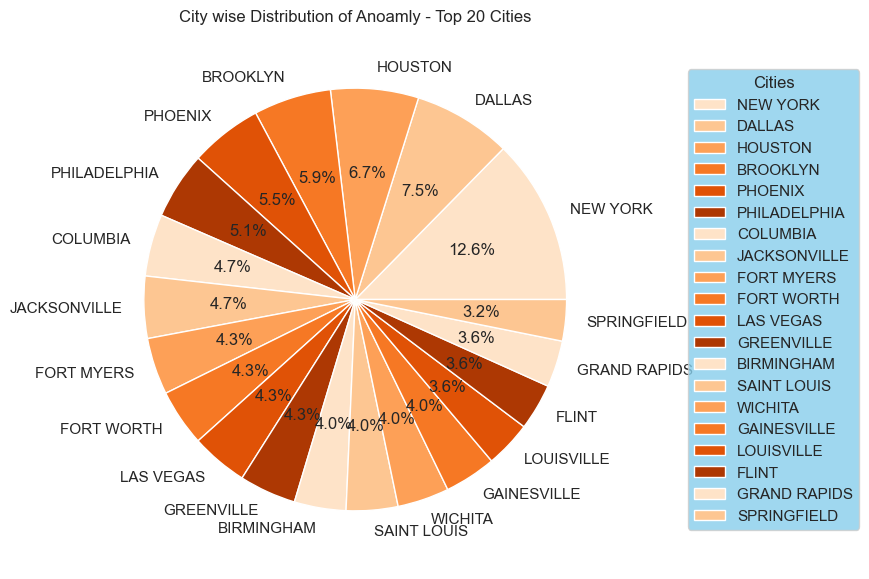

In [38]:
#filtering cities with rows which has anomaly 
cities_with_anomalies = df[df['Is_Anomaly']==1]['City of the Provider']

# counting the cities with occurence
city_counts = cities_with_anomalies.value_counts(normalize=True).head(20)

#creating pie chart
plt.figure(figsize=(6,7))
plt.pie(city_counts,labels=city_counts.index, autopct='%1.1f%%',colors=sns.color_palette('Oranges'))
plt.title('City wise Distribution of Anoamly - Top 20 Cities')
plt.legend(title='Cities' ,loc='center right',bbox_to_anchor=(1,0,0.6,1))
plt.axis('equal')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #73FBFD; font-size:120%; text-align:left">
<h3 align="left"><font color=Black>Inferences from the Pie-Chart :</font></h3>
    
- The pie chart shows __Top 20 Cities__ with anomaly percentage where __NEWYORK__ has highest no of anomalies __12.6%__ followed by __Dallas__ __7.5%__,  __Houston__ __6.7%__ .


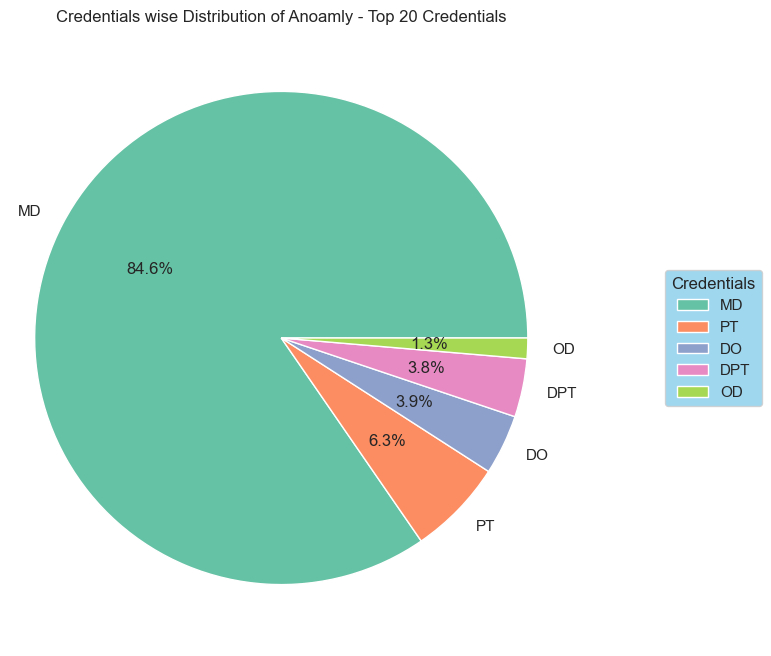

In [39]:
#filtering Credentials of the Provider with rows which has anomaly 
Credentials_with_anomalies = df[df['Is_Anomaly']==1]['Credentials of the Provider']

# counting the Credentials with occurence
Credential_counts = Credentials_with_anomalies.value_counts(normalize=True).head(5)

#creating pie chart
plt.figure(figsize=(7,8))
plt.pie(Credential_counts,labels=Credential_counts.index, autopct='%1.1f%%',colors=sns.color_palette('Set2'))
plt.title('Credentials wise Distribution of Anoamly - Top 5 Credentials')
plt.axis('equal')
plt.legend(title='Credentials' ,loc='center right',bbox_to_anchor=(1,0,0.4,1))
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #73FBFD; font-size:120%; text-align:left">
<h3 align="left"><font color=Black>Inferences from the Pie-Chart :</font></h3>
    
- The pie chart shows __Top 5 Credentials__ with anomaly percentage where __MD__ has highest no of anomalies __84.6%__ followed by __PT__ __6.3%__,  __DO__ __3.9%__ .


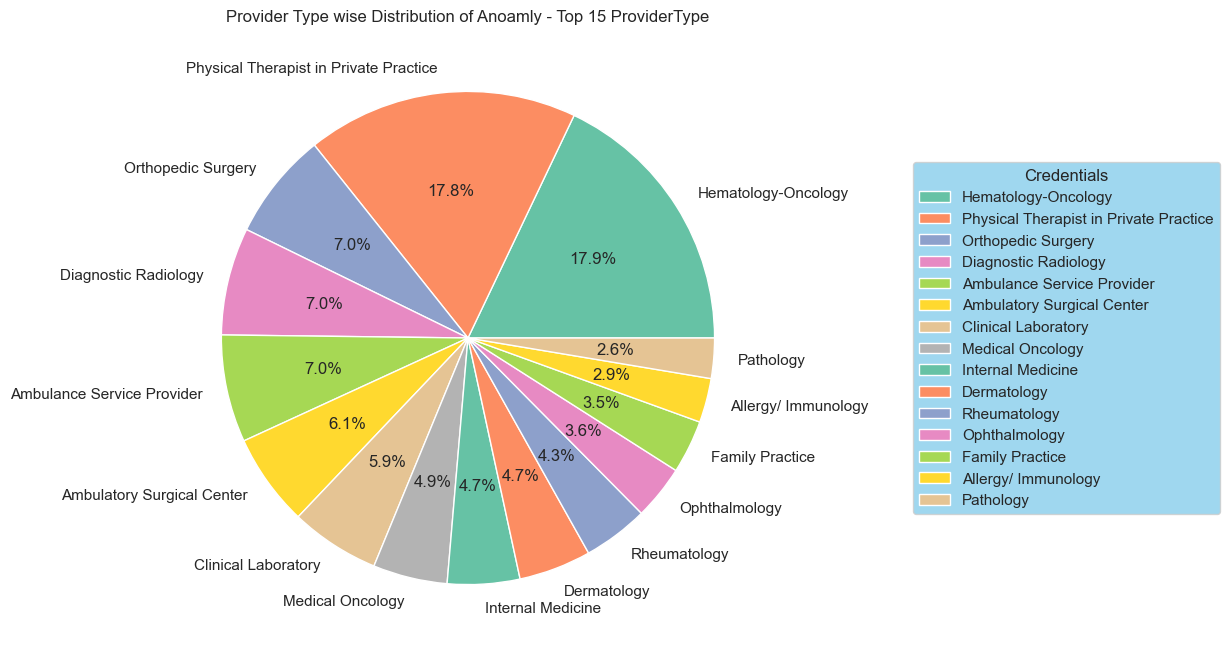

In [40]:
#filtering ProviderType with rows which has anomaly 
ProviderType_with_anomalies = df[df['Is_Anomaly']==1]['ProviderType']

# counting the ProviderType with occurence
ProviderType_counts = ProviderType_with_anomalies.value_counts(normalize=True).head(15)

#creating pie chart
plt.figure(figsize=(7,8))
plt.pie(ProviderType_counts,labels=ProviderType_counts.index, autopct='%1.1f%%',colors=sns.color_palette('Set2'))
plt.title('Provider Type wise Distribution of Anoamly - Top 15 ProviderType')
plt.axis('equal')
plt.legend(title='Credentials' ,loc='center right',bbox_to_anchor=(1,0,0.9,1))
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #73FBFD; font-size:120%; text-align:left">
<h3 align="left"><font color=Black>Inferences from the Pie-Chart :</font></h3>
    
- The pie chart shows __Top 15 ProviderType__ with anomaly percentage where __Hematology-Oncology__ has highest no of anomalies __17.9%__ followed by __Physical Therapist  in Private sector__ __17.8%__,  __Orthopedic surgery__ __7.0%__ .


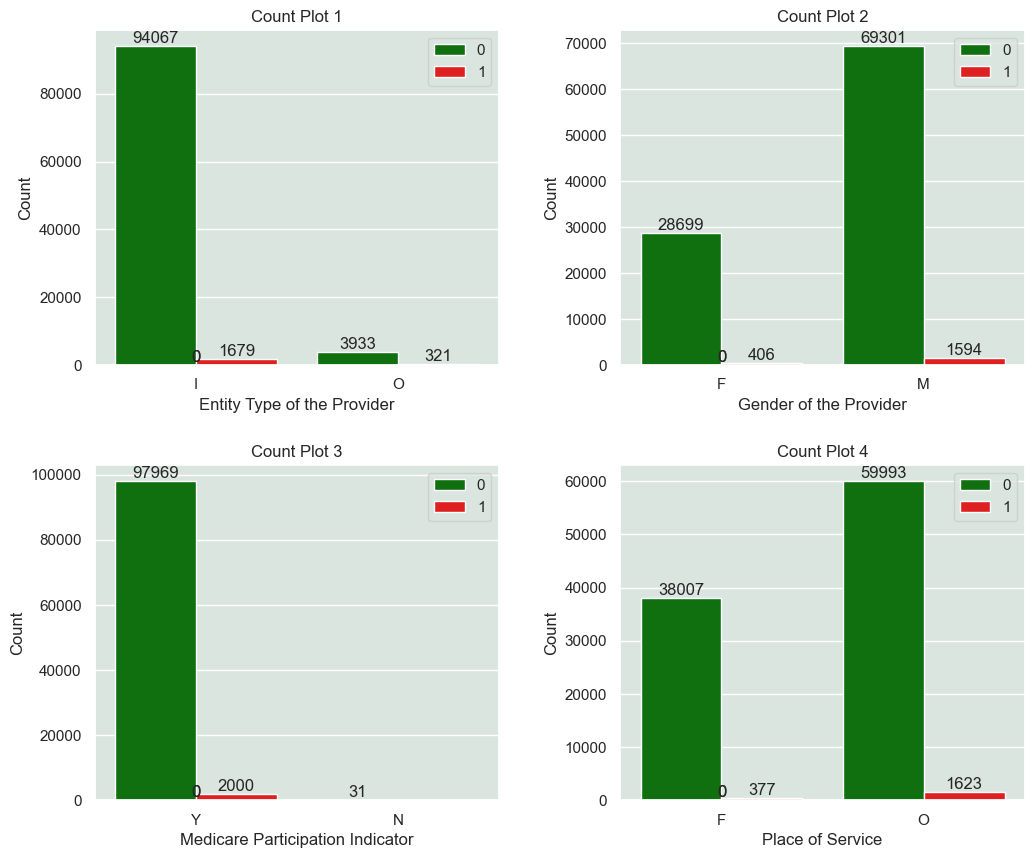

In [13]:
sns.set(rc={'axes.facecolor': '#DAE5E0'}, style='darkgrid')
fig, axs = plt.subplots(2,2, figsize=(12,10))

#Count plot 1
sns.countplot(x='Entity Type of the Provider',data=df, hue='Is_Anomaly',ax=axs[0,0],palette=['green','red'])
axs[0,0].set_title('Count Plot 1')
axs[0,0].set_xlabel('Entity Type of the Provider')
axs[0,0].set_ylabel('Count')
axs[0,0].legend()

#Count plot 2
sns.countplot(x='Gender of the Provider',data=df, hue='Is_Anomaly',ax=axs[0,1],palette=['green','red'])
axs[0,1].set_title('Count Plot 2')
axs[0,1].set_xlabel('Gender of the Provider')
axs[0,1].set_ylabel('Count')
axs[0,1].legend()

#Count plot 3
sns.countplot(x='Medicare Participation Indicator',data=df, hue='Is_Anomaly',ax=axs[1,0],palette=['green','red'])
axs[1,0].set_title('Count Plot 3')
axs[1,0].set_xlabel('Medicare Participation Indicator')
axs[1,0].set_ylabel('Count')
axs[1,0].legend()

#Count plot 1
sns.countplot(x='Place of Service',data=df, hue='Is_Anomaly',ax=axs[1,1],palette=['green','red'])
axs[1,1].set_title('Count Plot 4')
axs[1,1].set_xlabel('Place of Service')
axs[1,1].set_ylabel('Count')
axs[1,1].legend()

for ax in axs.flat:
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), ha='center', va='bottom')

plt.subplots_adjust(wspace=0.3,hspace=0.3)

plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #FCEF61; font-size:120%; text-align:left">
<h3 align="left"><font color=Black>Inferences from the Count Plots :</font></h3>
    
- The Countplots shows the anomaly in the __categorical columns__ <font color=red> __red__ </font> bars shows __anomaly__ and the <font color=green> __green__ </font>bars represent the __normal__ point.
- __Count Plot 1__ shows anomaly in the __Entity__ where __I-individual__ has <font color=red> __1679__ </font> __anomalies__ where __O-organization__ has<font color=red> __321__ </font> __anomalies__ only which indicates that individual entity has more fraudulent transactions.
- __Count Plot 2__ shows anomaly in the __Gender__ where __F-Female__ has <font color=red> __406__ </font> __anomalies__ where __M-Male__ has<font color=red> __1594__ </font> __anomalies__  which indicates that  in Male has more fraudulent transactions.
- __Count Plot 3__ shows anomaly in the __Medicare Participation Indicator__ where __Y-Yes__ has <font color=red> __2000__ </font> __anomalies__ where __N-No__ has<font color=red> __0__ </font> __anomalies__ only which indicates that Yes has all fraudulent transactions.
- __Count Plot 4__ shows anomaly in the __Place of Service__ where __F-Facility__ has <font color=red> __377__ </font> __anomalies__ where __O-Non-Facility__ has<font color=red> __1623__ </font> __anomalies__  which indicates that Non Facility Places has more no of fraudulent transactions.


<div style="border-radius:10px; padding: 15px; background-color: #C5A3D4; font-size:130%; text-align:left">

<h2 align="left"><font color=black> Using One Class SVM algorithm </font></h2>

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

    
- Given the multi-dimensional nature of the data, it would be prudent to use algorithms that can detect anomalies in multi-dimensional spaces. I am going to use the __One-class SVM__ algorithm for this task. This is a type of unsupervised machine learning algorithm that can be used for anomaly detection.
- In a one-class SVM, the algorithm is trained on a dataset that contains only normal or in-class samples.The goal is to find a decision boundary that separates the normal data from the rest of feature space, which is considered as anomalous.

In [14]:
#Defining model parameters and initialization of model
model = OneClassSVM(nu=0.035, kernel='rbf', gamma=0.1)

#fitting data to model
model.fit(hdata_scaled)

#Predicting anomalies
anomaly_scores = model.predict(hdata_scaled)

#creating new column to identify anomalies
df_s['Is_Anomaly'] = [1 if x == -1 else 0 for x in anomaly_scores]

#displaying few rows of data after prediction
df_s.sample(5).T

,62141,19774,24432,32550,49508
Credentials of the Provider,MD,MD,PA,MD,DO
Gender of the Provider,M,M,F,M,M
Entity Type of the Provider,O,I,I,I,I
City of the Provider,BAILEYVILLE,JACKSONVILLE,LEXINGTON,LUBBOCK,JUPITER
State Code of the Provider,ME,FL,KY,TX,FL
Country Code of the Provider,US,US,US,US,US
ProviderType,Ambulance Service Provider,Diagnostic Radiology,Physician Assistant,General Surgery,Family Practice
Medicare Participation Indicator,Y,Y,Y,Y,Y
Place of Service,F,F,O,O,F
HCPCS Description,Specialty care transport (sct),"X-ray of spine, 1 view",Insertion of needle into vein for collection o...,"New patient office or other outpatient visit, ...",Critical care delivery critically ill or injur...


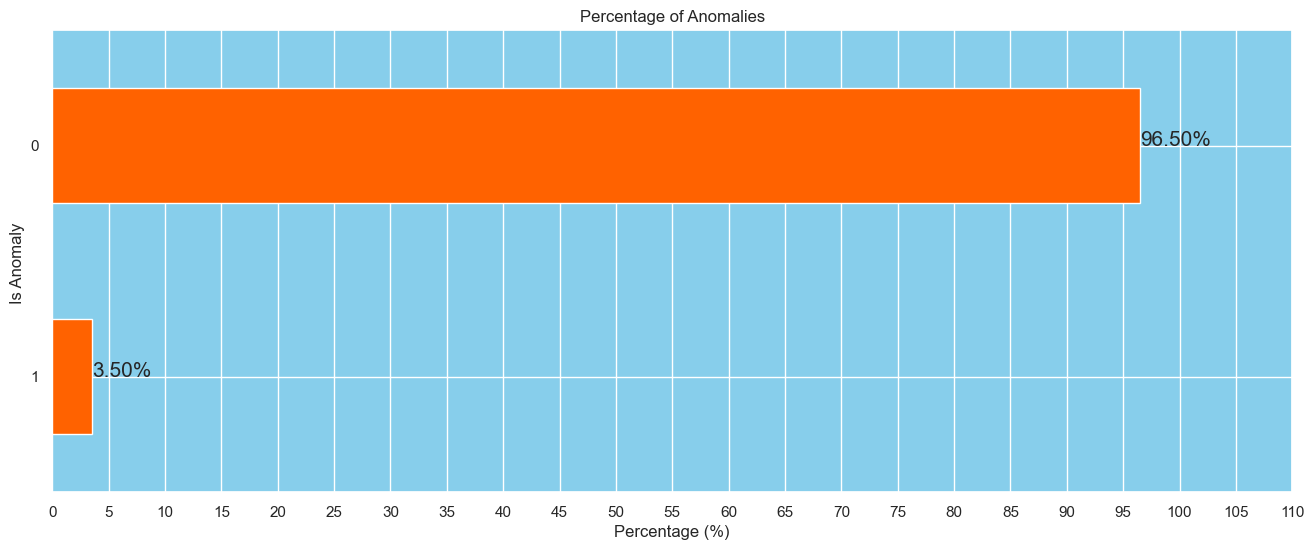

In [9]:
# Set seaborn plot style
sns.set(rc={'axes.facecolor': 'skyblue'}, style='darkgrid')

# Calculate the percentage of anomalies
anomalies_percentage = df_s['Is_Anomaly'].value_counts(normalize=True) * 100

# Plotting the percentage of anomalies
plt.figure(figsize=(16,6))
anomalies_percentage.plot(kind='barh', color='#ff6200')

# Adding the percentage labels on the bars
for index, value in enumerate(anomalies_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Anomalies')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Anomaly ')
plt.gca().invert_yaxis()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: pink; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inferences from the Graph :</font></h3>
    
- There are total __3.50%__ anomalies are detected by our model i.e.around 3500 entries in entire dataset    .


PermutationExplainer explainer: 20001it [11:54, 27.60it/s]                                                             


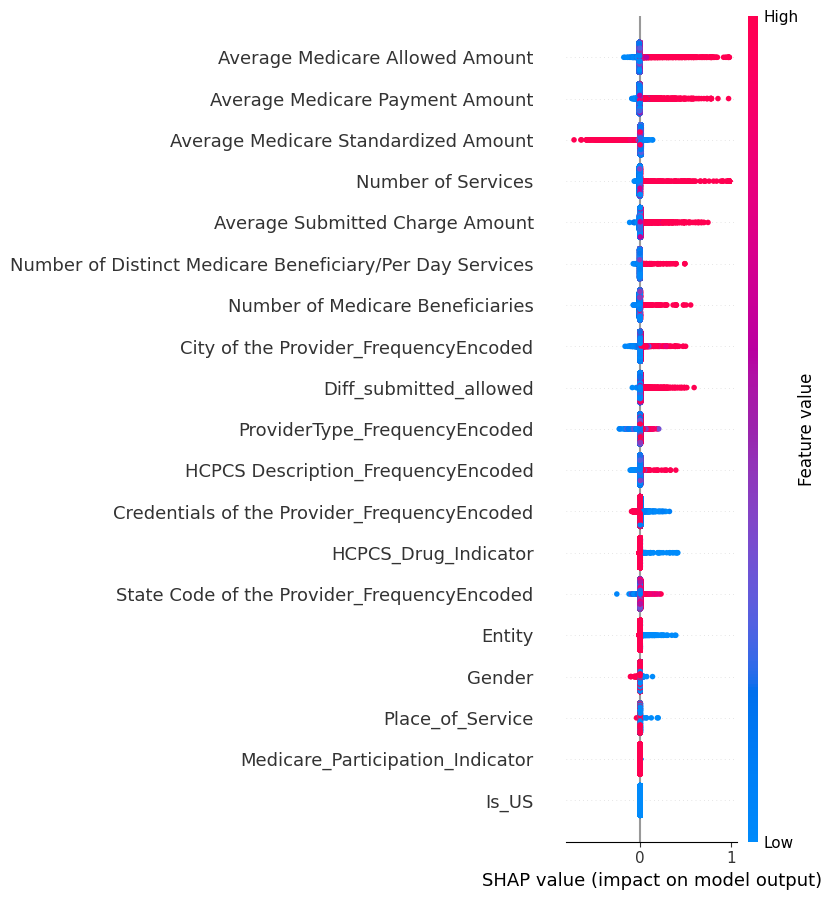

In [5]:
# sns.set(rc={'axes.facecolor': 'white'}, style='darkgrid')

#creating new dataframe with scaled data and anomaly column as target variable for shap analysis
Osvm = hdata_scaled.join(df_s['Is_Anomaly'], how='inner')

#creating sample size due to system constraints
#Osvm_sample = Osvm.sample(n=10000)

#splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Osvm.drop('Is_Anomaly',axis=1),Osvm['Is_Anomaly'],test_size=0.2, random_state=42)

#training logistic regression model on data
model = LogisticRegression()
model.fit(X_train, y_train)

#creating a SHAP explainer object
explainer = shap.Explainer(model.predict,X_train)

#computing shap values for the testing data
shap_values = explainer.shap_values(X_test)

#Plotting the SHAP values using a summary plot
shap.summary_plot(shap_values, X_test, show=False)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #40E380; font-size:120%; text-align:left">
<h3 align="left"><font color=black>Inferences from the Summary Plot of One Class SVM :</font></h3>
    
- There is major __positive__ infulence of __Numerical__ columns on model except column __Average Medicare Standardized Amount__  which impacting model __negatively__  some of categorical columns are adding impact on model __positively__ like __HCPCS description__, __city__ and __Provider Type__ .


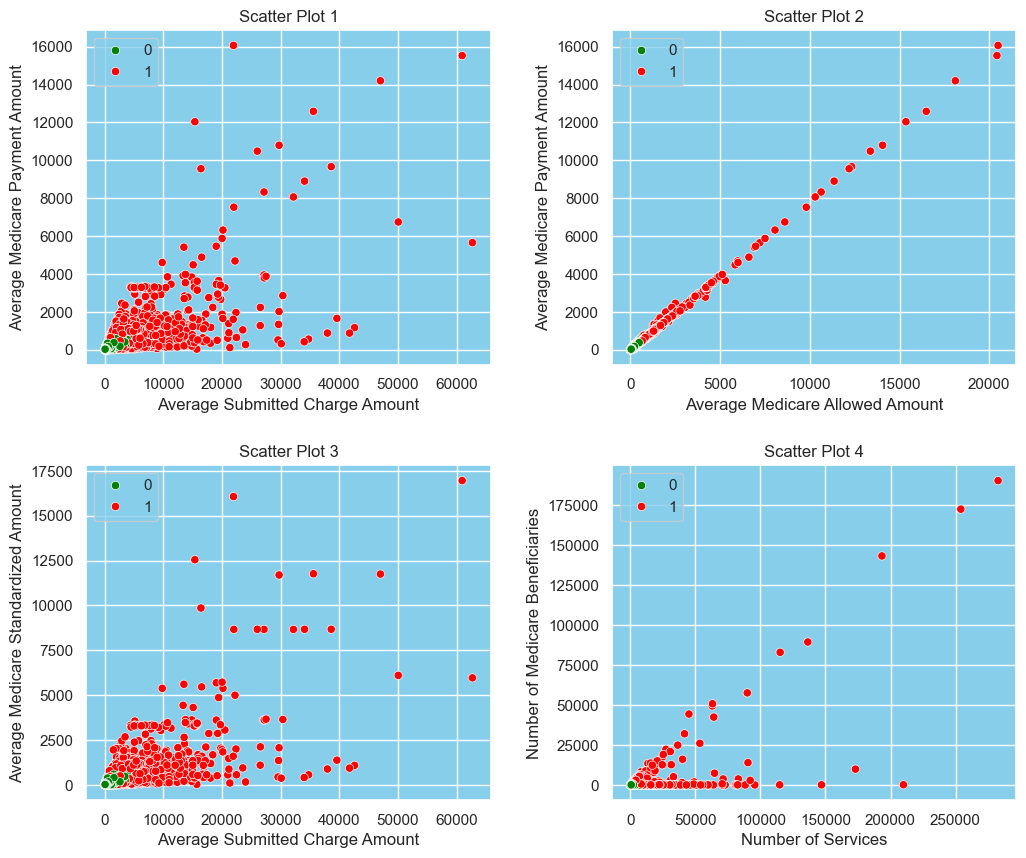

In [10]:
sns.set(rc={'axes.facecolor': 'skyblue'}, style='darkgrid')
fig, axs = plt.subplots(2,2, figsize=(12,10))

#Scatter plot 1
sns.scatterplot(x='Average Submitted Charge Amount', y='Average Medicare Payment Amount',data=df_s, hue='Is_Anomaly',ax=axs[0,0],
               palette=['green','red'])
axs[0,0].set_title('Scatter Plot 1')
axs[0,0].set_xlabel('Average Submitted Charge Amount')
axs[0,0].set_ylabel('Average Medicare Payment Amount')
axs[0,0].legend()

#Scatter plot 2
sns.scatterplot(x='Average Medicare Allowed Amount', y='Average Medicare Payment Amount',data=df_s, hue='Is_Anomaly',ax=axs[0,1],
               palette=['green','red'])
axs[0,1].set_title('Scatter Plot 2')
axs[0,1].set_xlabel('Average Medicare Allowed Amount')
axs[0,1].set_ylabel('Average Medicare Payment Amount')
axs[0,1].legend()

#Scatter plot 3
sns.scatterplot(x='Average Submitted Charge Amount', y='Average Medicare Standardized Amount',data=df_s, hue='Is_Anomaly',ax=axs[1,0],
               palette=['green','red'])
axs[1,0].set_title('Scatter Plot 3')
axs[1,0].set_xlabel('Average Submitted Charge Amount')
axs[1,0].set_ylabel('Average Medicare Standardized Amount')
axs[1,0].legend()

#Scatter plot 4
sns.scatterplot(x='Number of Services', y='Number of Medicare Beneficiaries',data=df_s, hue='Is_Anomaly',ax=axs[1,1],
               palette=['green','red'])
axs[1,1].set_title('Scatter Plot 4')
axs[1,1].set_xlabel('Number of Services')
axs[1,1].set_ylabel('Number of Medicare Beneficiaries')
axs[1,1].legend()

plt.subplots_adjust(wspace=0.3,hspace=0.3)

plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #8DFC65; font-size:120%; text-align:left">
<h3 align="left"><font color=Black>Inferences from the Scatter-Plots :</font></h3>
    
- By Visualizing the __Scatter Plots__ we can see that our __One-class SVM__ algorithm works well, and our model is able to distinguish between Normal points and Anomalies.
- There is __clear separation__ can be seen between the normal and anomalous point
- __Green__ dots indicates the __Normal__ points while __red__ dots indicates __Anomaly__.

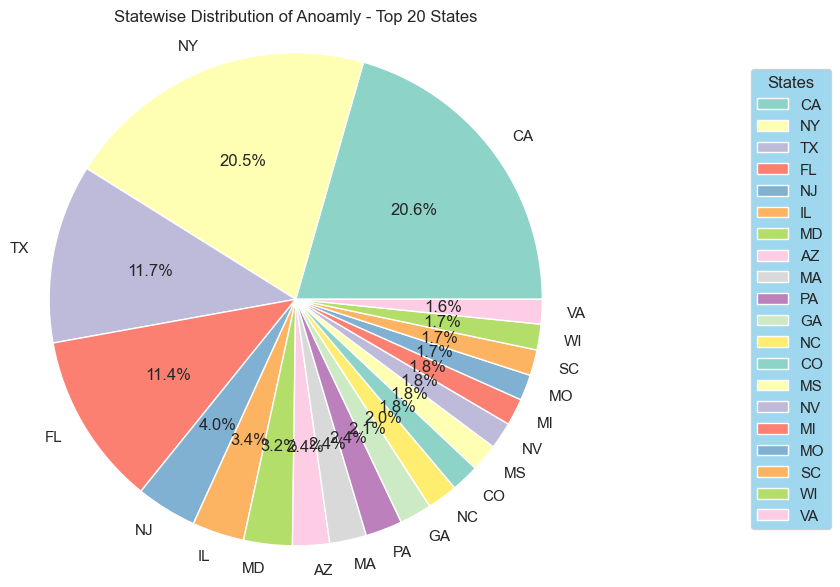

In [11]:
#filtering States with rows which has anomaly 
States_with_anomalies = df_s[df_s['Is_Anomaly']==1]['State Code of the Provider']

# counting the States with occurence
State_counts = States_with_anomalies.value_counts(normalize=True).head(20)

#creating pie chart
plt.figure(figsize=(7,7))
plt.pie(State_counts,labels=State_counts.index, autopct='%1.1f%%',colors=sns.color_palette('Set3'))
plt.axis('equal')
plt.title('Statewise Distribution of Anoamly - Top 20 States')
plt.legend(title='States' ,loc='center right',bbox_to_anchor=(1,0,0.5,1))
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #73FBFD; font-size:120%; text-align:left">
<h3 align="left"><font color=Black>Inferences from the Pie-Chart :</font></h3>
    
- The pie chart shows __Top 20 state__ with anomaly percentage where __California__ has highest no of anomalies __20.6%__ followed by __New York__ __20.5%__,and __Texas__ __11.7%__  .


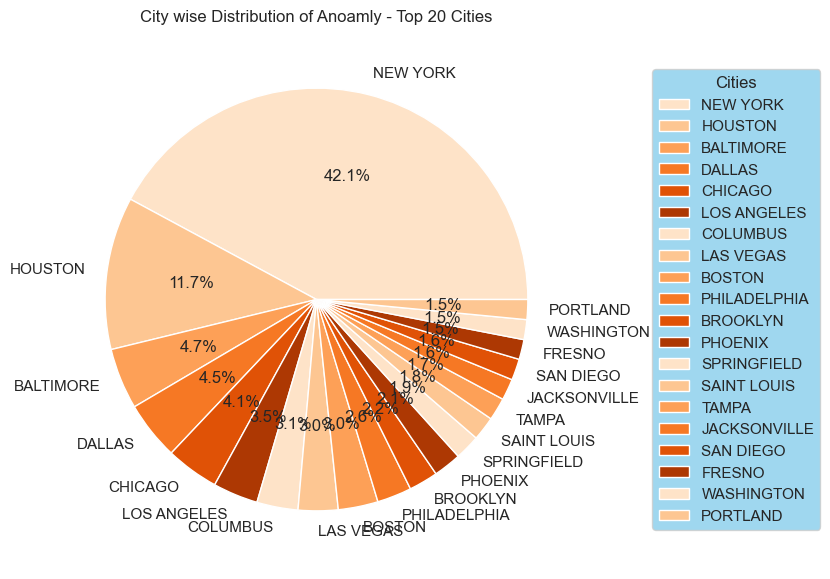

In [12]:
#filtering cities with rows which has anomaly 
cities_with_anomalies = df_s[df_s['Is_Anomaly']==1]['City of the Provider']

# counting the cities with occurence
city_counts = cities_with_anomalies.value_counts(normalize=True).head(20)

#creating pie chart
plt.figure(figsize=(6,7))
plt.pie(city_counts,labels=city_counts.index, autopct='%1.1f%%',colors=sns.color_palette('Oranges'))
plt.title('City wise Distribution of Anoamly - Top 20 Cities')
plt.legend(title='Cities' ,loc='center right',bbox_to_anchor=(1,0,0.6,1))
plt.axis('equal')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #73FBFD; font-size:120%; text-align:left">
<h3 align="left"><font color=Black>Inferences from the Pie-Chart :</font></h3>
    
- The pie chart shows __Top 20 Cities__ with anomaly percentage where __NEWYORK__ has highest no of anomalies __42.1%__ followed by __Houston__ __11.7%__,   __Baltimore__ __4.7%__ .


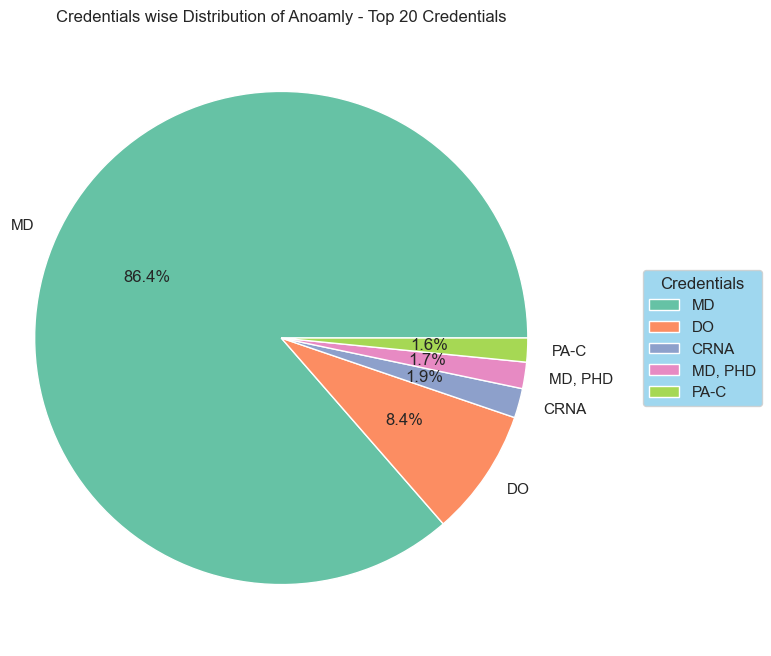

In [13]:
#filtering Credentials of the Provider with rows which has anomaly 
Credentials_with_anomalies = df_s[df_s['Is_Anomaly']==1]['Credentials of the Provider']

# counting the Credentials with occurence
Credential_counts = Credentials_with_anomalies.value_counts(normalize=True).head(5)

#creating pie chart
plt.figure(figsize=(7,8))
plt.pie(Credential_counts,labels=Credential_counts.index, autopct='%1.1f%%',colors=sns.color_palette('Set2'))
plt.title('Credentials wise Distribution of Anoamly - Top 5 Credentials')
plt.axis('equal')
plt.legend(title='Credentials' ,loc='center right',bbox_to_anchor=(1,0,0.4,1))
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #73FBFD; font-size:120%; text-align:left">
<h3 align="left"><font color=Black>Inferences from the Pie-Chart :</font></h3>
    
- The pie chart shows __Top 5 Credentials__ with anomaly percentage where __MD__ has highest no of anomalies __86.4%__ followed by __DO__ __8.4%__,  __CRNA__ __1.9%__ .


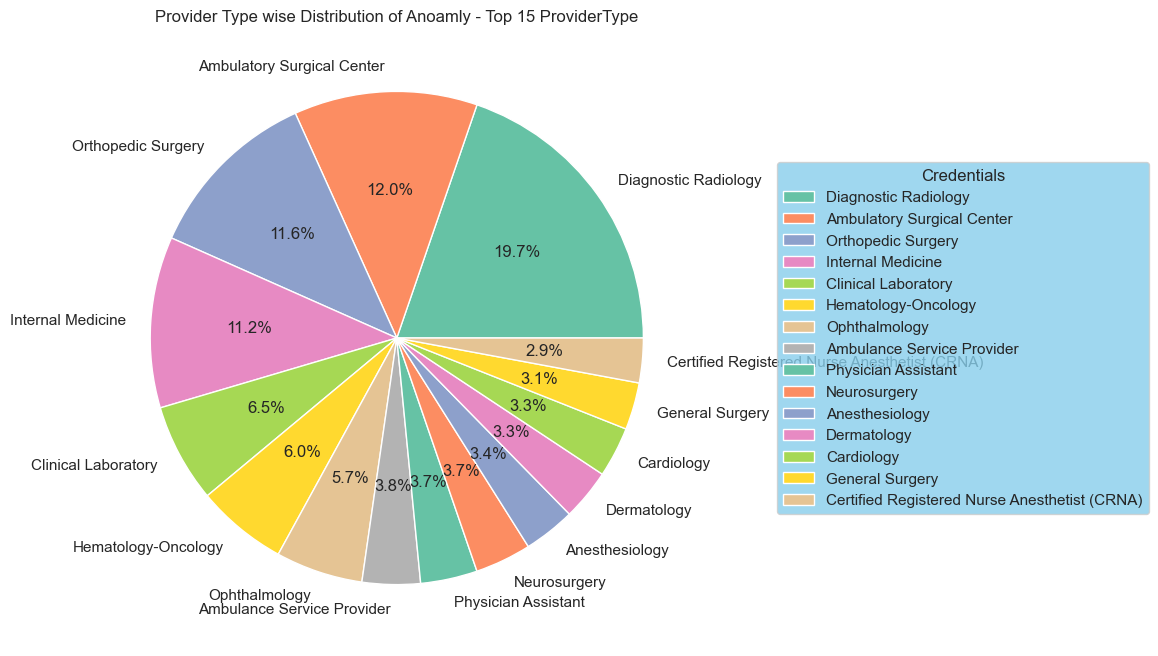

In [14]:
#filtering ProviderType with rows which has anomaly 
ProviderType_with_anomalies = df_s[df_s['Is_Anomaly']==1]['ProviderType']

# counting the ProviderType with occurence
ProviderType_counts = ProviderType_with_anomalies.value_counts(normalize=True).head(15)

#creating pie chart
plt.figure(figsize=(7,8))
plt.pie(ProviderType_counts,labels=ProviderType_counts.index, autopct='%1.1f%%',colors=sns.color_palette('Set2'))
plt.title('Provider Type wise Distribution of Anoamly - Top 15 ProviderType')
plt.axis('equal')
plt.legend(title='Credentials' ,loc='center right',bbox_to_anchor=(1,0,0.9,1))
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #73FBFD; font-size:120%; text-align:left">
<h3 align="left"><font color=Black>Inferences from the Pie-Chart :</font></h3>
    
- The pie chart shows __Top 15 ProviderType__ with anomaly percentage where __Diagnostic Radiology__ has highest no of anomalies __19.7%__ followed by __Ambulatory Surgical center__ __12.0%__,  __Orthopedic surgery__ __11.6%__ .


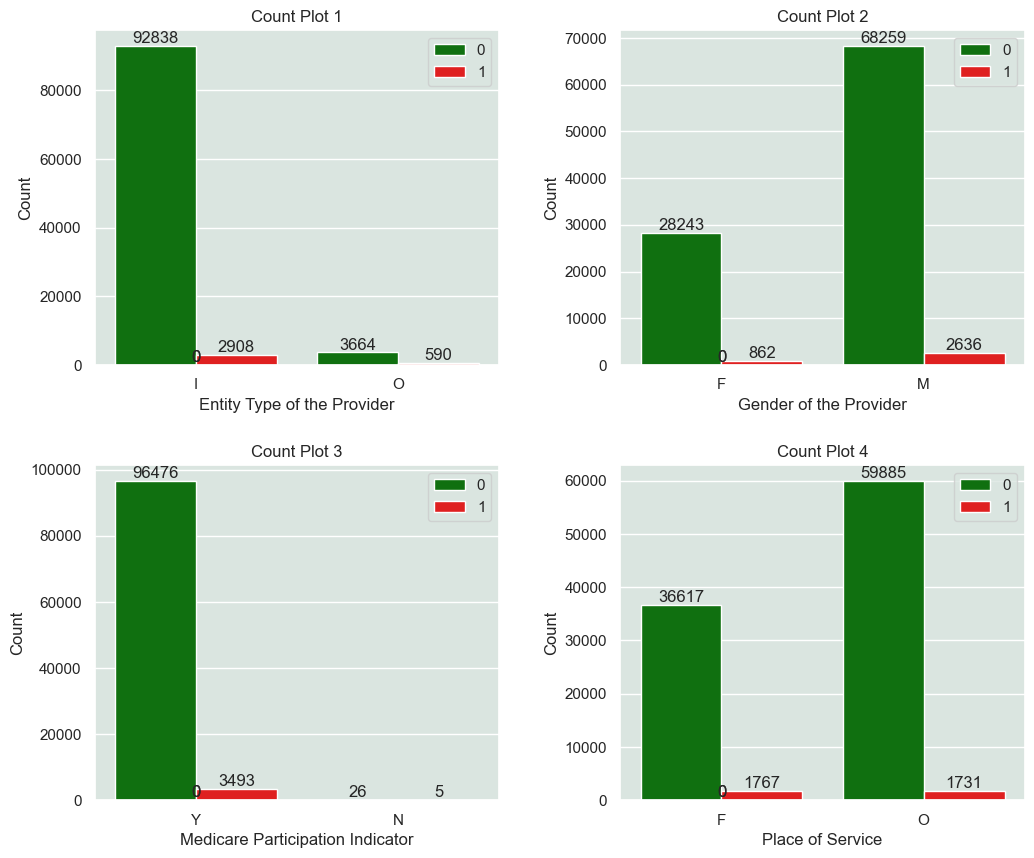

In [15]:
sns.set(rc={'axes.facecolor': '#DAE5E0'}, style='darkgrid')
fig, axs = plt.subplots(2,2, figsize=(12,10))

#Count plot 1
sns.countplot(x='Entity Type of the Provider',data=df_s, hue='Is_Anomaly',ax=axs[0,0],palette=['green','red'])
axs[0,0].set_title('Count Plot 1')
axs[0,0].set_xlabel('Entity Type of the Provider')
axs[0,0].set_ylabel('Count')
axs[0,0].legend()

#Count plot 2
sns.countplot(x='Gender of the Provider',data=df_s, hue='Is_Anomaly',ax=axs[0,1],palette=['green','red'])
axs[0,1].set_title('Count Plot 2')
axs[0,1].set_xlabel('Gender of the Provider')
axs[0,1].set_ylabel('Count')
axs[0,1].legend()

#Count plot 3
sns.countplot(x='Medicare Participation Indicator',data=df_s, hue='Is_Anomaly',ax=axs[1,0],palette=['green','red'])
axs[1,0].set_title('Count Plot 3')
axs[1,0].set_xlabel('Medicare Participation Indicator')
axs[1,0].set_ylabel('Count')
axs[1,0].legend()

#Count plot 1
sns.countplot(x='Place of Service',data=df_s, hue='Is_Anomaly',ax=axs[1,1],palette=['green','red'])
axs[1,1].set_title('Count Plot 4')
axs[1,1].set_xlabel('Place of Service')
axs[1,1].set_ylabel('Count')
axs[1,1].legend()

plt.subplots_adjust(wspace=0.3,hspace=0.3)

for ax in axs.flat:
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), ha='center', va='bottom')

plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #FCEF61; font-size:120%; text-align:left">
<h3 align="left"><font color=Black>Inferences from the Count Plots :</font></h3>
    
- The Countplots shows the anomaly in the __categorical columns__ <font color=red> __red__ </font> bars shows __anomaly__ and the <font color=green> __green__ </font>bars represent the __normal__ point.
- __Count Plot 1__ shows anomaly in the __Entity__ where __I-individual__ has <font color=red> __2908__ </font> __anomalies__ where __O-organization__ has<font color=red> __590__ </font> __anomalies__ only which indicates that individual entity has more fraudulent transactions.
- __Count Plot 2__ shows anomaly in the __Gender__ where __F-Female__ has <font color=red> __862__ </font> __anomalies__ where __M-Male__ has<font color=red> __2636__ </font> __anomalies__  which indicates that  in Male has more fraudulent transactions.
- __Count Plot 3__ shows anomaly in the __Medicare Participation Indicator__ where __Y-Yes__ has <font color=red> __3493__ </font> __anomalies__ where __N-No__ has<font color=red> __5__ </font> __anomalies__ only which indicates that Yes has more fraudulent transactions.
- __Count Plot 4__ shows anomaly in the __Place of Service__ where __F-Facility__ has <font color=red> __1767__ </font> __anomalies__ where __O-Non-Facility__ has<font color=red> __1731__ </font> __anomalies__  which indicates that both Places has equal no of fraudulent transactions.
